In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda
Using device: cuda


Test U-Net

In [2]:
data = dataset_seq()
loaders = get_loaders(data, 1)

In [3]:
name = 'NN_library/ConvNet/ConvNet'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

In [4]:
L_stiff, L_shr = test(net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

In [5]:
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

4.7471534e-05 3.070696e-05
2384.469 1476.4089


In [6]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)

In [7]:
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[4.9584638e-12 4.4425434e-07 8.6856153e-07 1.4575843e-06 2.8800121e-06
 4.2511256e-06 5.2950104e-06 6.2897061e-06 7.5635476e-06 8.9503201e-06
 9.4714078e-06] 
 [1.7888012e-10 3.5297649e-07 7.0485544e-07 1.2690734e-06 2.2938580e-06
 3.2174178e-06 4.0211012e-06 4.8719298e-06 5.8657815e-06 6.8102377e-06
 7.3740184e-06]
[  0.           0.89573437  32.128723   161.29613    261.21884
 307.07553    318.5396     327.20258    324.89688    325.56064
 325.65405   ] 
 [  0.           0.63569164  30.887121   161.46812    235.9968
 252.9088     279.5123     293.5876     279.08408    283.72104
 302.33282   ]


Text(0, 0.5, 'Stiffness loss')

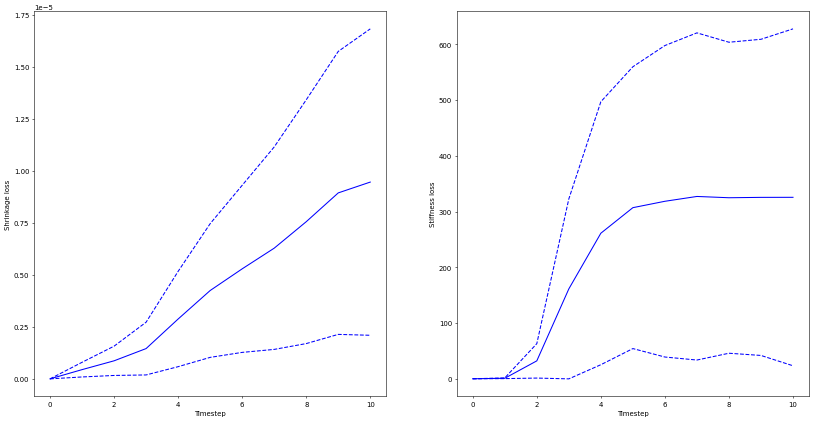

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')

In [9]:
unet = AutoUNet()
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet', args)

In [11]:
L_stiff, L_shr = test_w_Autonet(net, unet, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)
shr_mean = L_shr.sum(axis=1).mean()
shr_std = L_shr.sum(axis=1).std()
stiff_mean = L_stiff.sum(axis=1).mean()
stiff_std = L_stiff.sum(axis=1).std()
print(shr_mean, shr_std)
print(stiff_mean, stiff_std)

0.00035335566 8.643778e-05
13064.934 2074.055


In [12]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print(shr_mean, '\n', shr_std)
print(stiff_mean, '\n', stiff_std)

[7.5743949e-14 7.1879142e-05 7.0740520e-05 5.8080361e-05 4.4789831e-05
 3.5822763e-05 2.7358690e-05 1.8750945e-05 1.3747541e-05 1.2185817e-05] 
 [2.5307744e-12 6.1723345e-06 7.4562136e-06 1.1533322e-05 1.3711526e-05
 1.5024008e-05 1.5146084e-05 1.3106209e-05 1.0143130e-05 9.7133307e-06]
[   0.       480.83124 2109.3516  2867.1204  2399.1863  1778.6716
 1311.6244   937.8871   686.75616  493.50467] 
 [  0.      172.00838 741.9143  689.1293  488.85184 526.9254  521.0591
 481.97842 433.08218 367.90475]
